In [14]:
import boolean2pew as bn
import EnsembleSimulation as esim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [47]:
def plot_state_succession(states,state_labels=None,title=None, nodes=None, fontsizey=16):

    '''
    Creates a plot of the trajectory performed by a BooleanNet model.
    
    Inputs:
    states - container of boolean2 State objects or of dictionaries equivalent to those.
    state_labels (optional) - container of strings corresponding to every state. They will be the labels on the Y axis. Default: range(len(states))
    title (optional) - the title of the plot
    nodes (optional) - the set of nodes to be whose trajectory should be plotted. The set can be a subset or identical set to the nodes in the states. If list the order of the list will be respected on the plot.
    fontsizex (optional) - the fontsize of the X axis labels (the node names). Default: 10
    
    '''
    from matplotlib import pyplot as plt
    import matplotlib

    if nodes==None:
        nodes=states[0].keys()
    state_transition=[]
    for s in states:
        state_transition.append([s[k] for k in nodes])
    cmap = matplotlib.colors.ListedColormap(['#0B0881', '#F1F85B'])
    steps=len(state_transition)
    
    plt.figure(figsize=(steps/2,len(nodes)))
    plt.imshow(np.array(state_transition).T, interpolation='none',cmap=cmap)
    ax = plt.gca()
    plt.yticks(range(len(nodes)),nodes, fontsize=fontsizey)   
    if state_labels==None:
        plt.xticks(range(steps),fontsize=12)
    else:
        plt.xticks(range(steps),state_labels,fontsize=12)
    if title!=None:
        plt.title(title)
    ax.set_yticks(np.arange(-.5, len(nodes),1),minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2,axis='both')
    plt.savefig('figures/'+title+'.png',dpi=300)
    plt.savefig('figures/'+title+'.pdf')

    plt.show()


In [48]:
model_name = 'MiDAS_Cell_Cycle_Arrests_Apoptosis_Fine'

with open(model_name + '.booleannet','r') as f:
    rules = f.read()

In [49]:
df_states = pd.read_excel('MiDAS_Cell_Cycle_Arrests_Apoptosis_attractors_gr20_10_2__mainFigStarts.xlsx',header=5)[:133]

figure_initial_state_columns = {'3A':76,'3B':110,'4B':122,'5A':113,'5B':108,'5C':76,'5D':81}
figure_perturbation_params = {'3A':('GF_High',1,30,90),'3B':('Glucose',0,30,80),'4B':('SIRT3',0,30,steps),'5A':('ROS_Ext',1,30,80),'5B':('ROS_Ext',1,30,80),'5C':('ROS_Ext',1,30,80),'5D':('ROS_Ext',1,30,80)}

3A


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


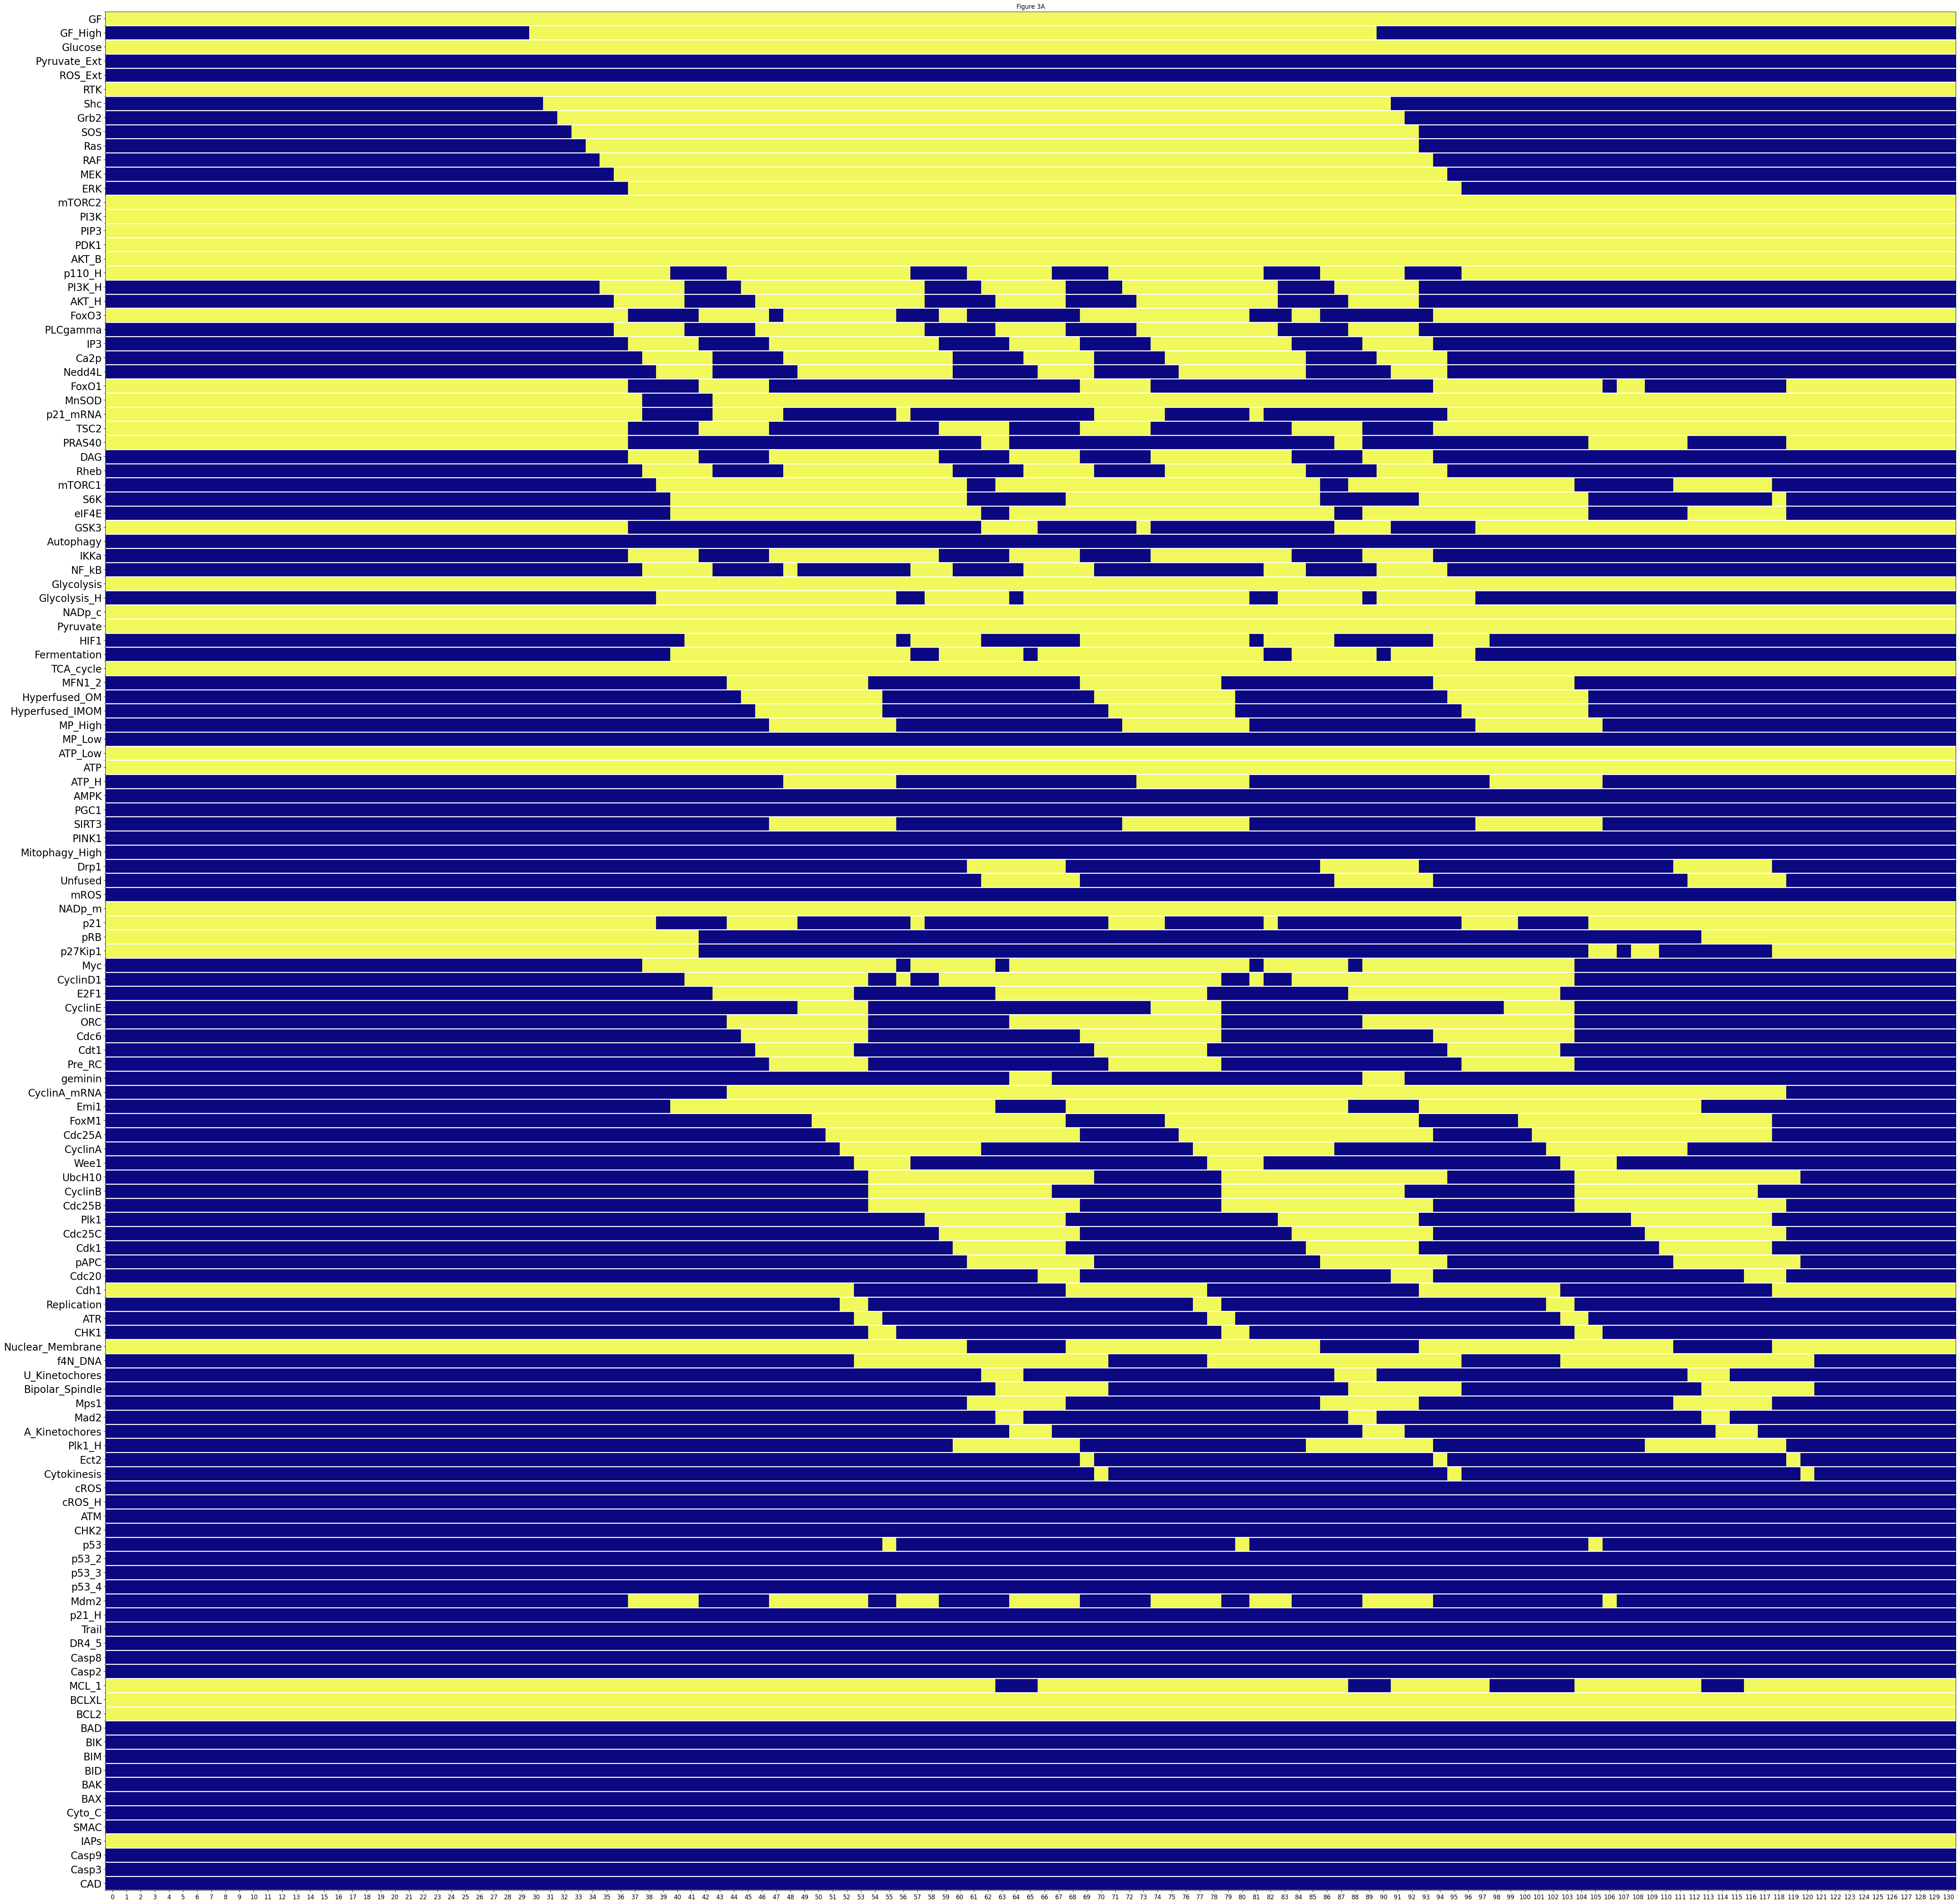

3B


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.33s/it]


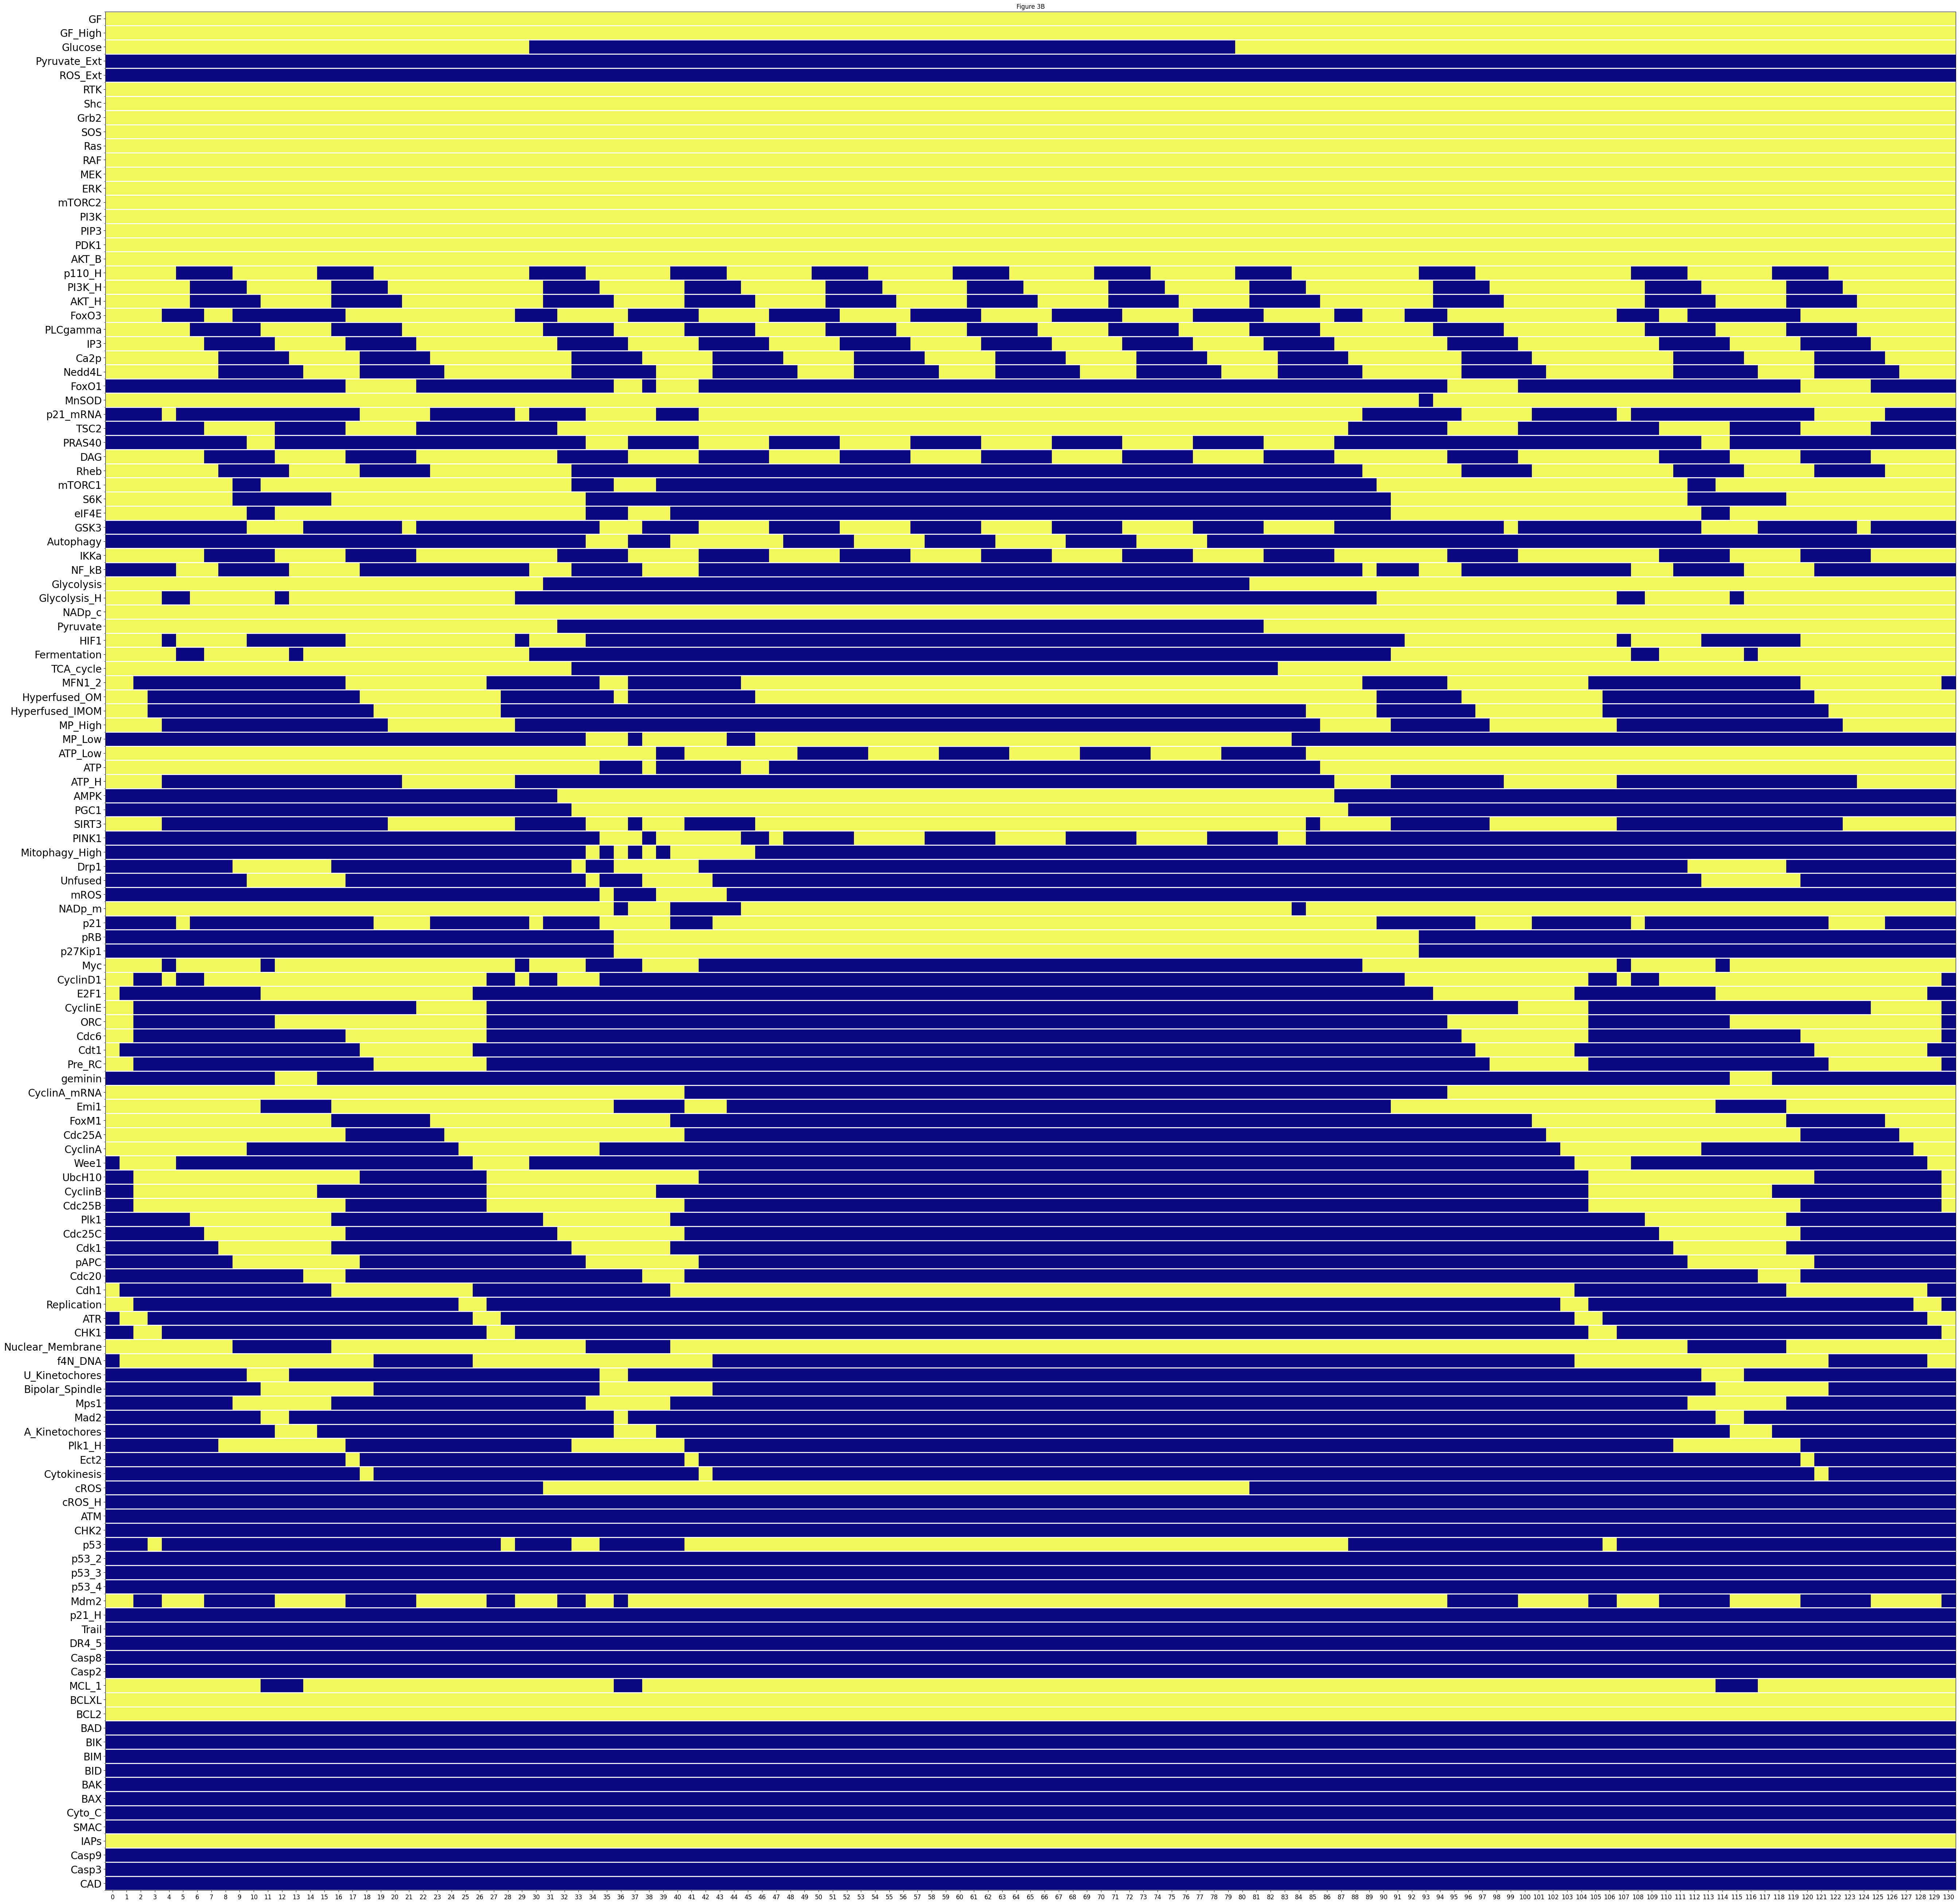

4B


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


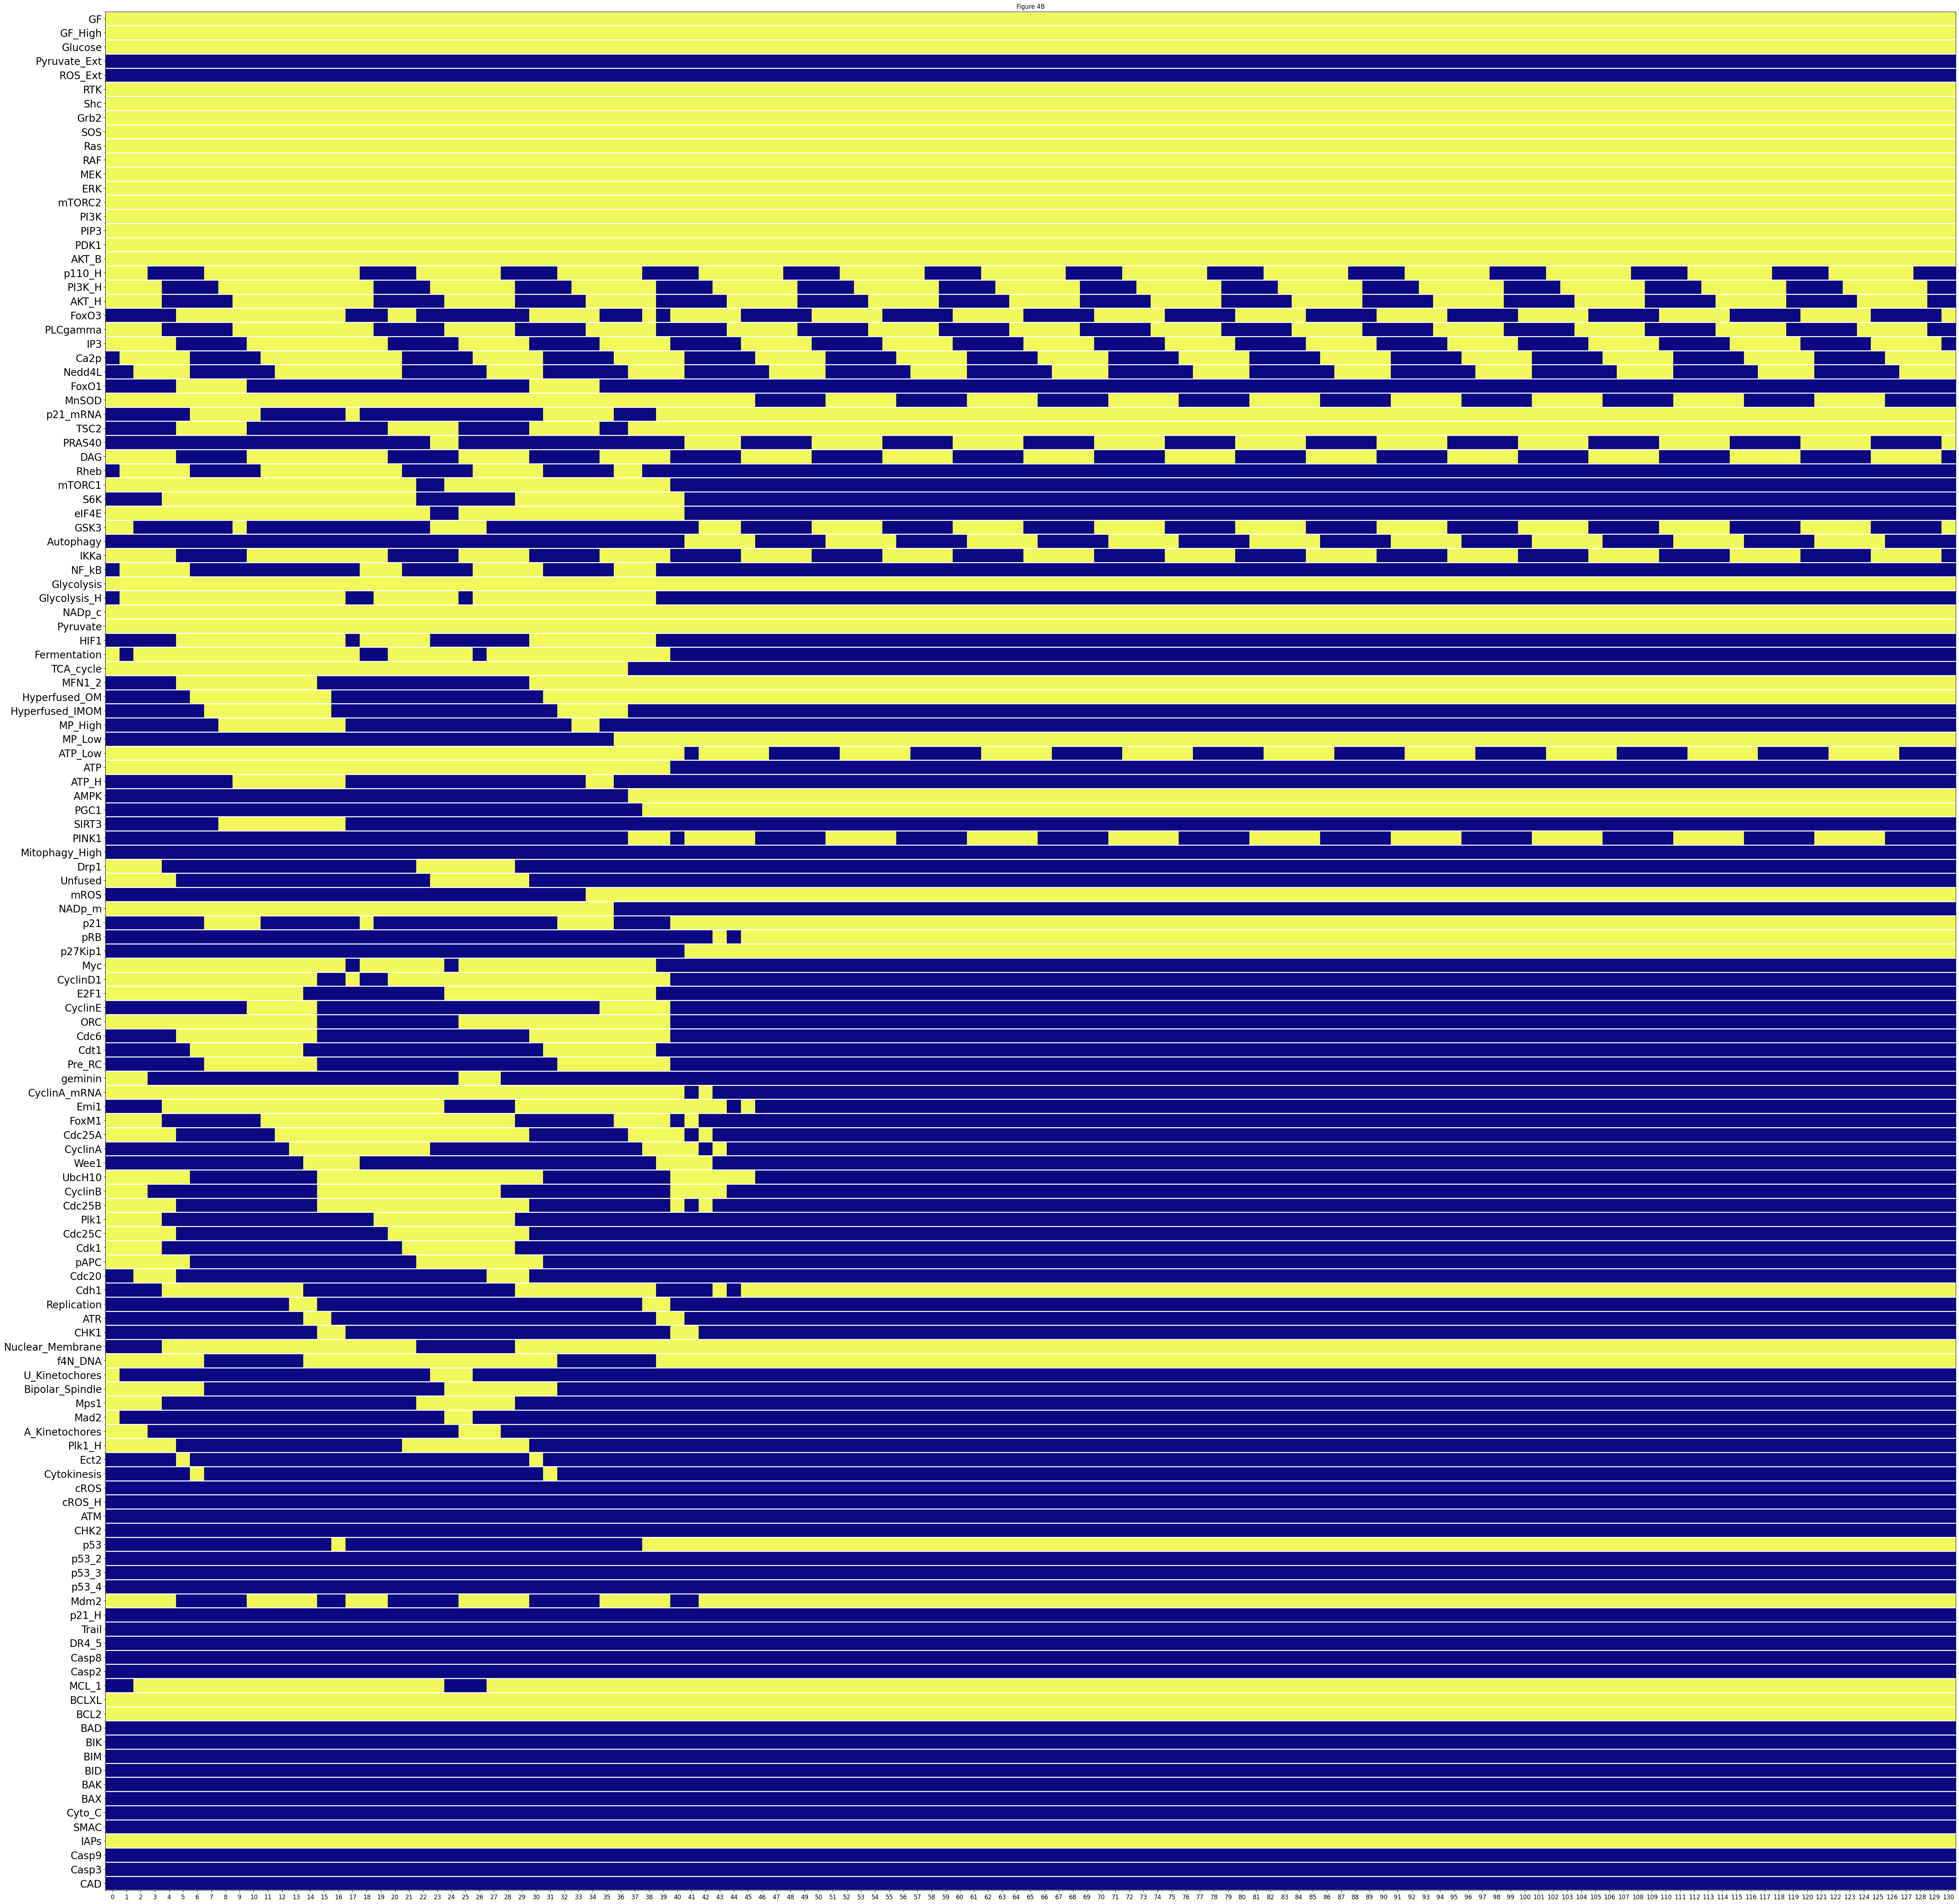

5A


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/it]


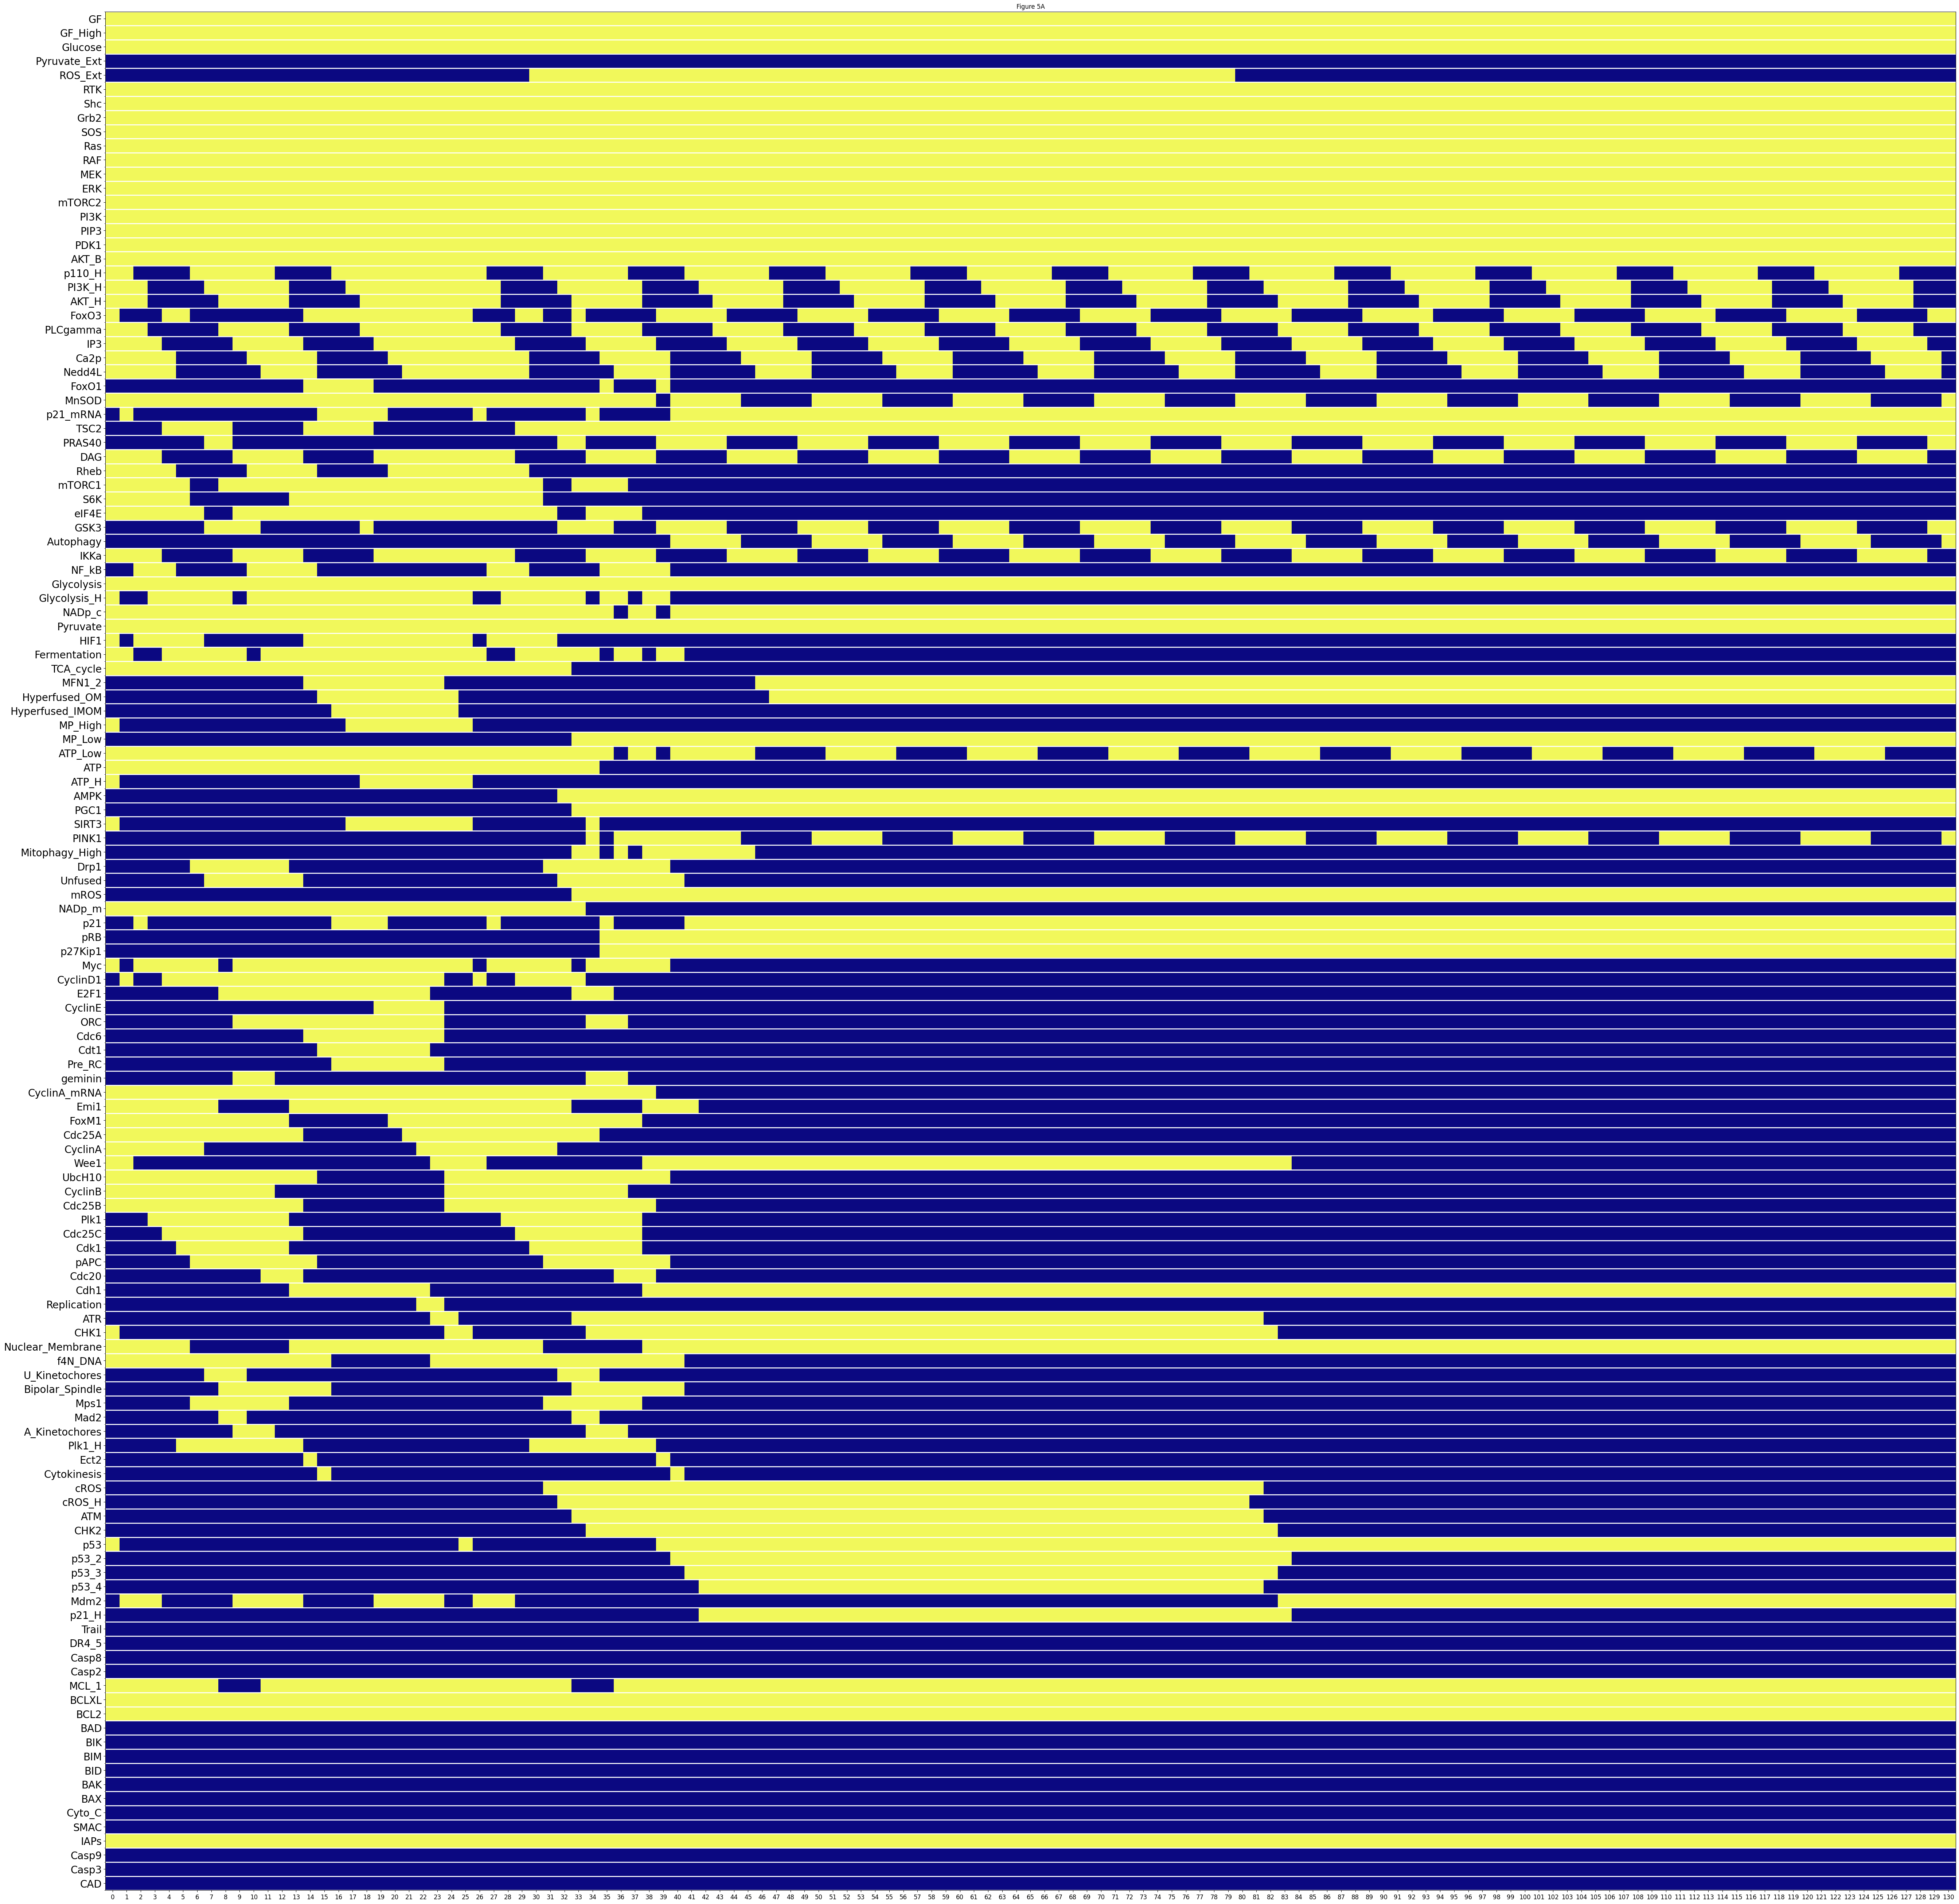

5B


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.37s/it]


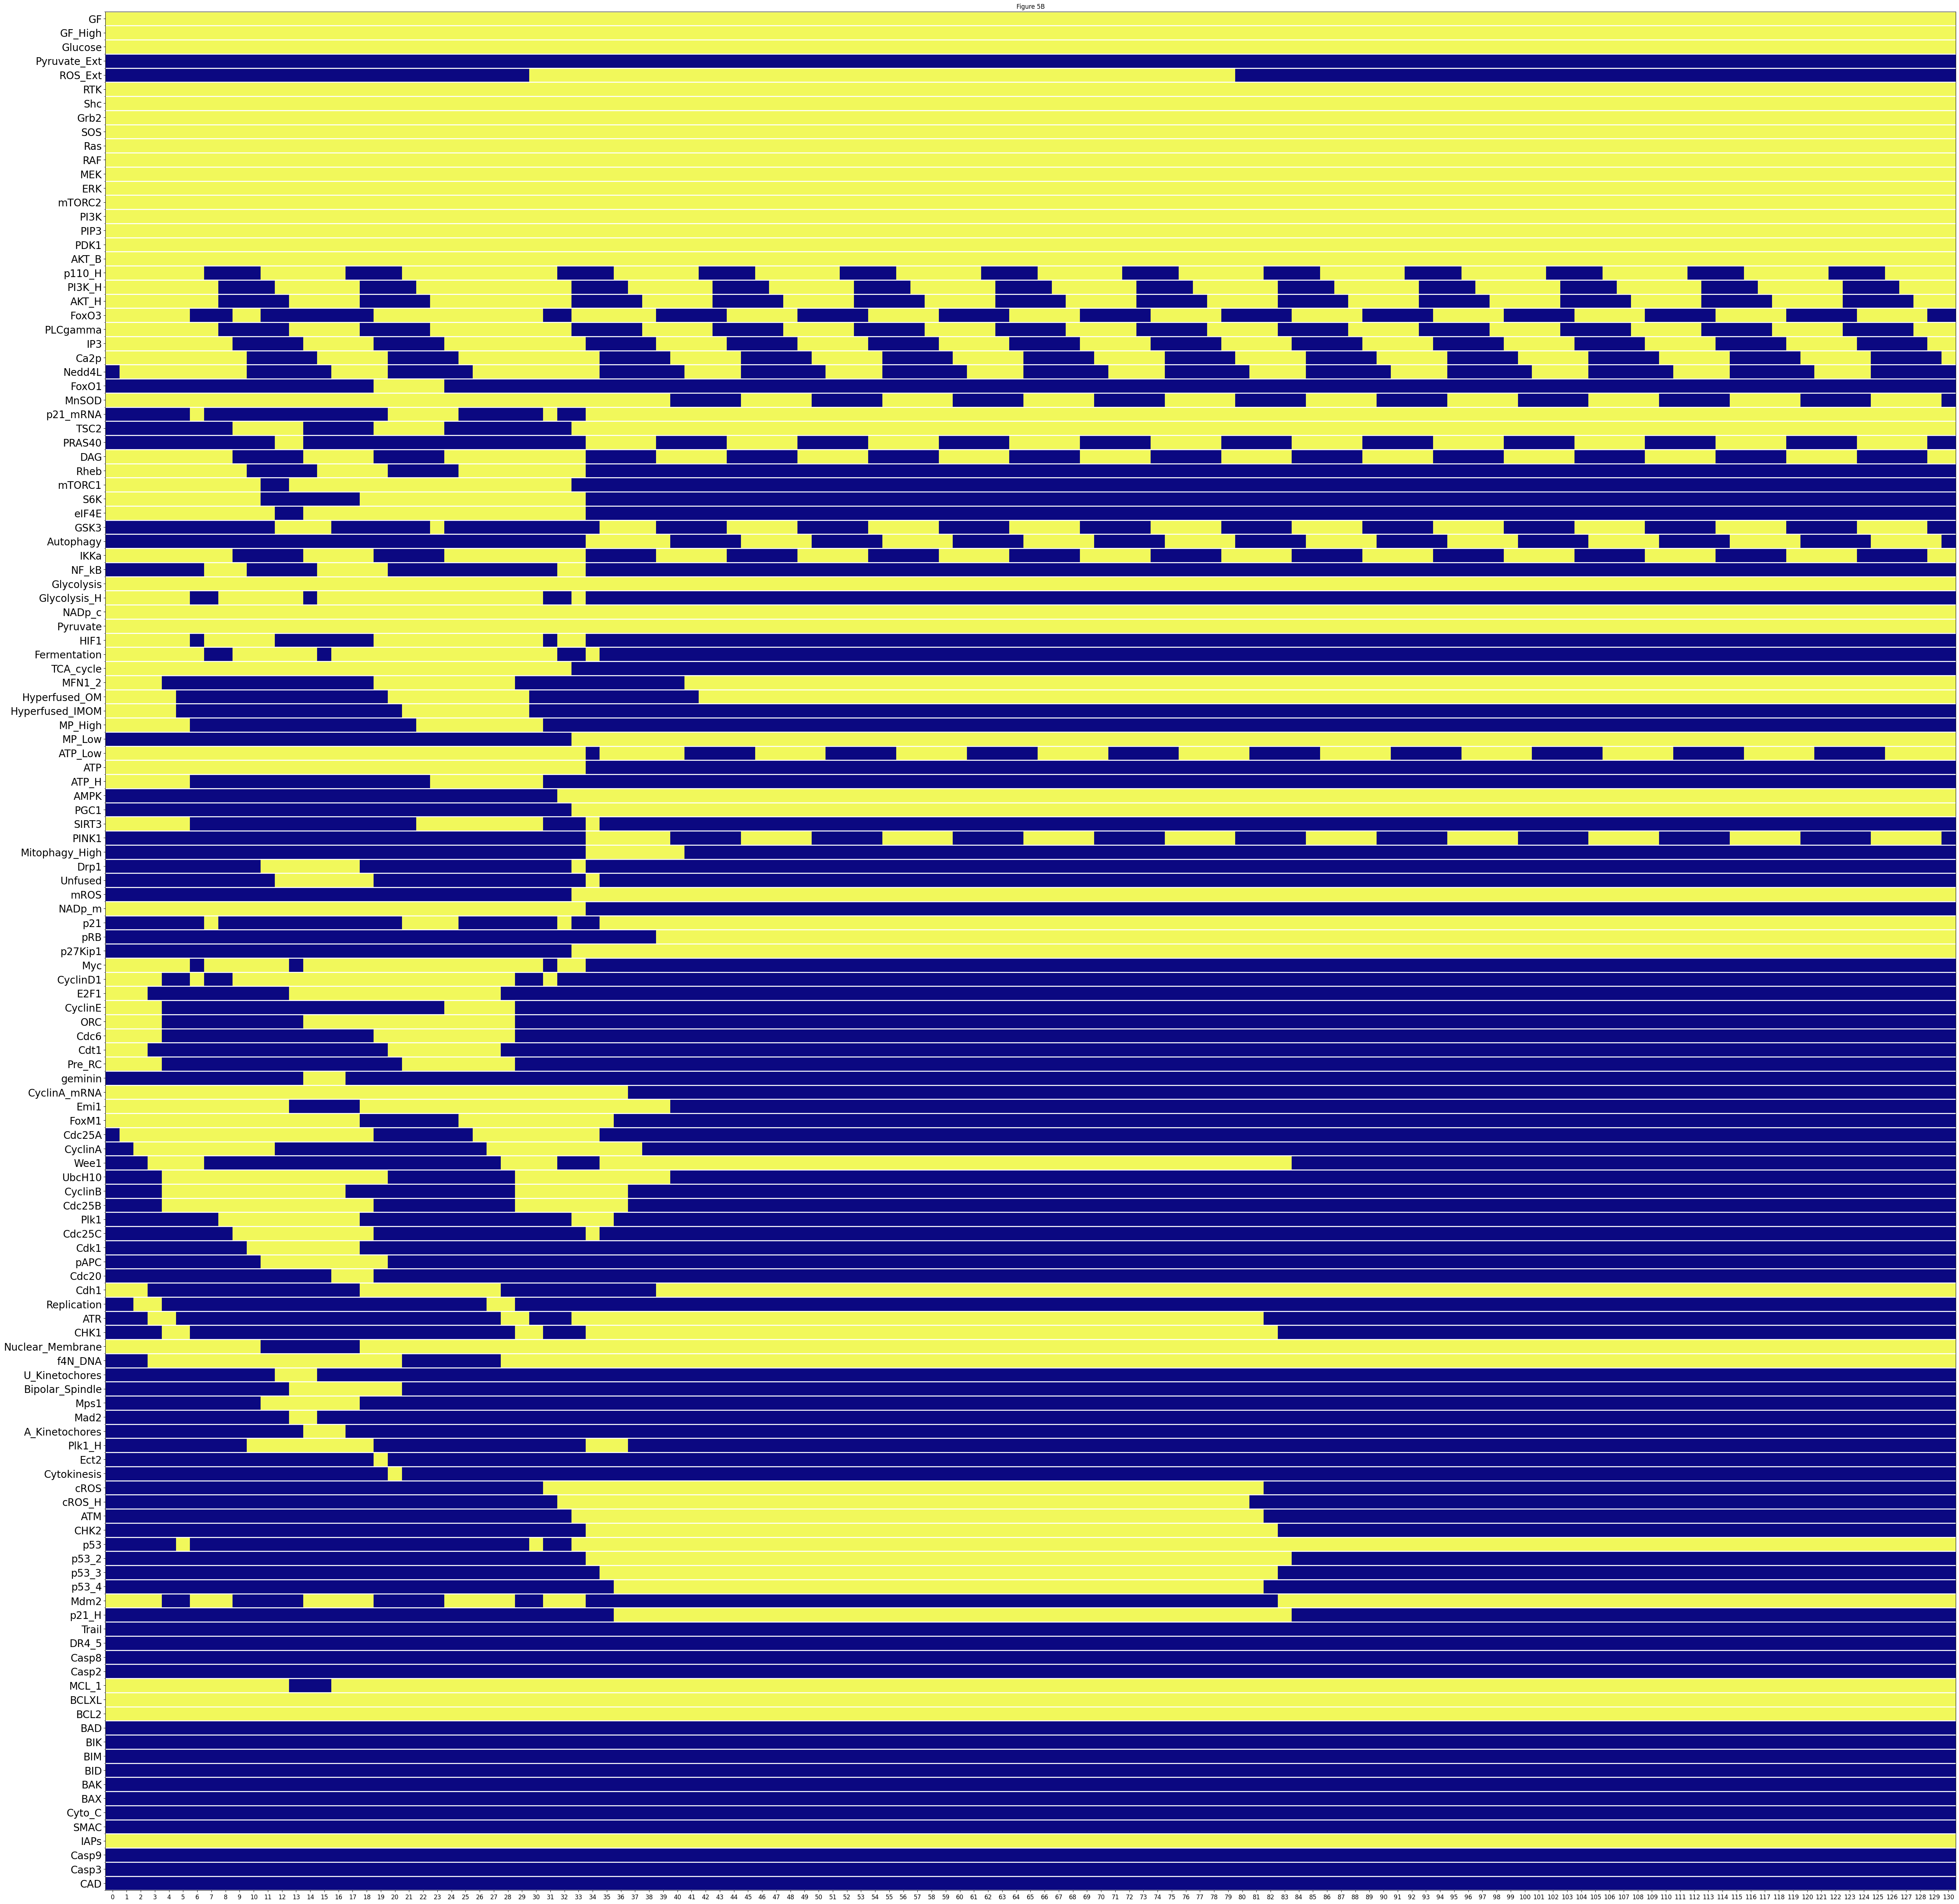

5C


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


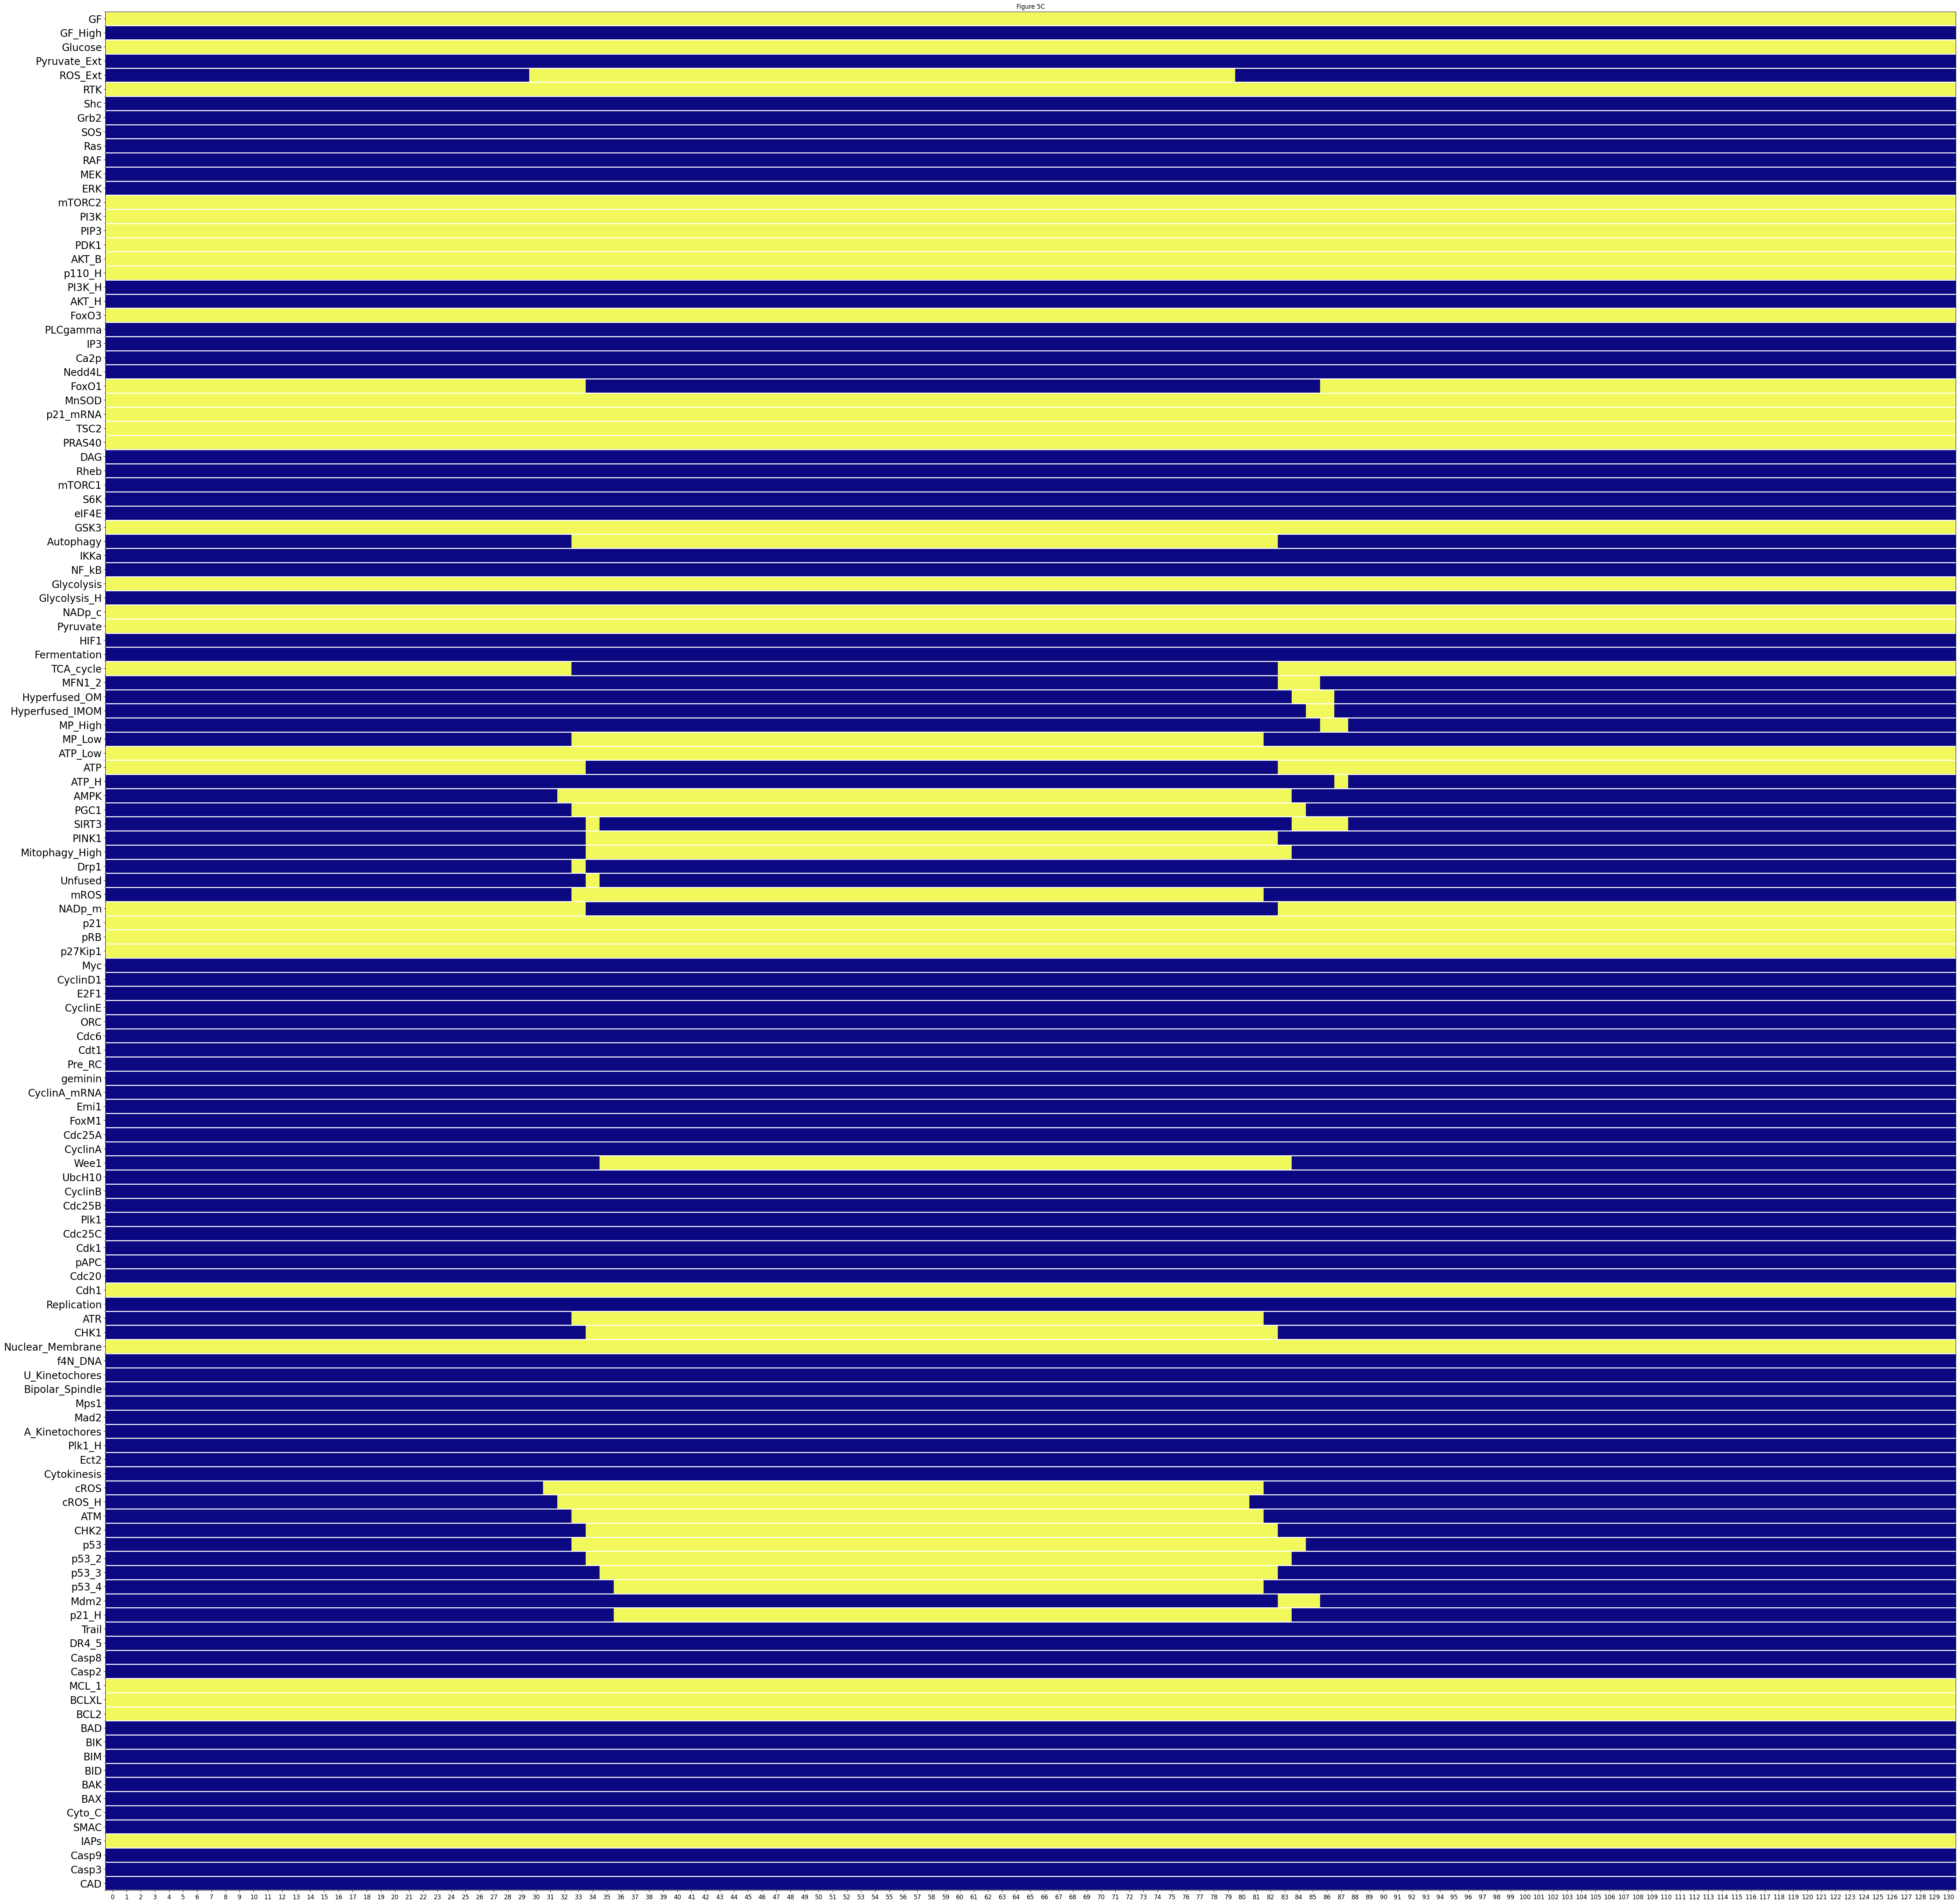

5D


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.37s/it]


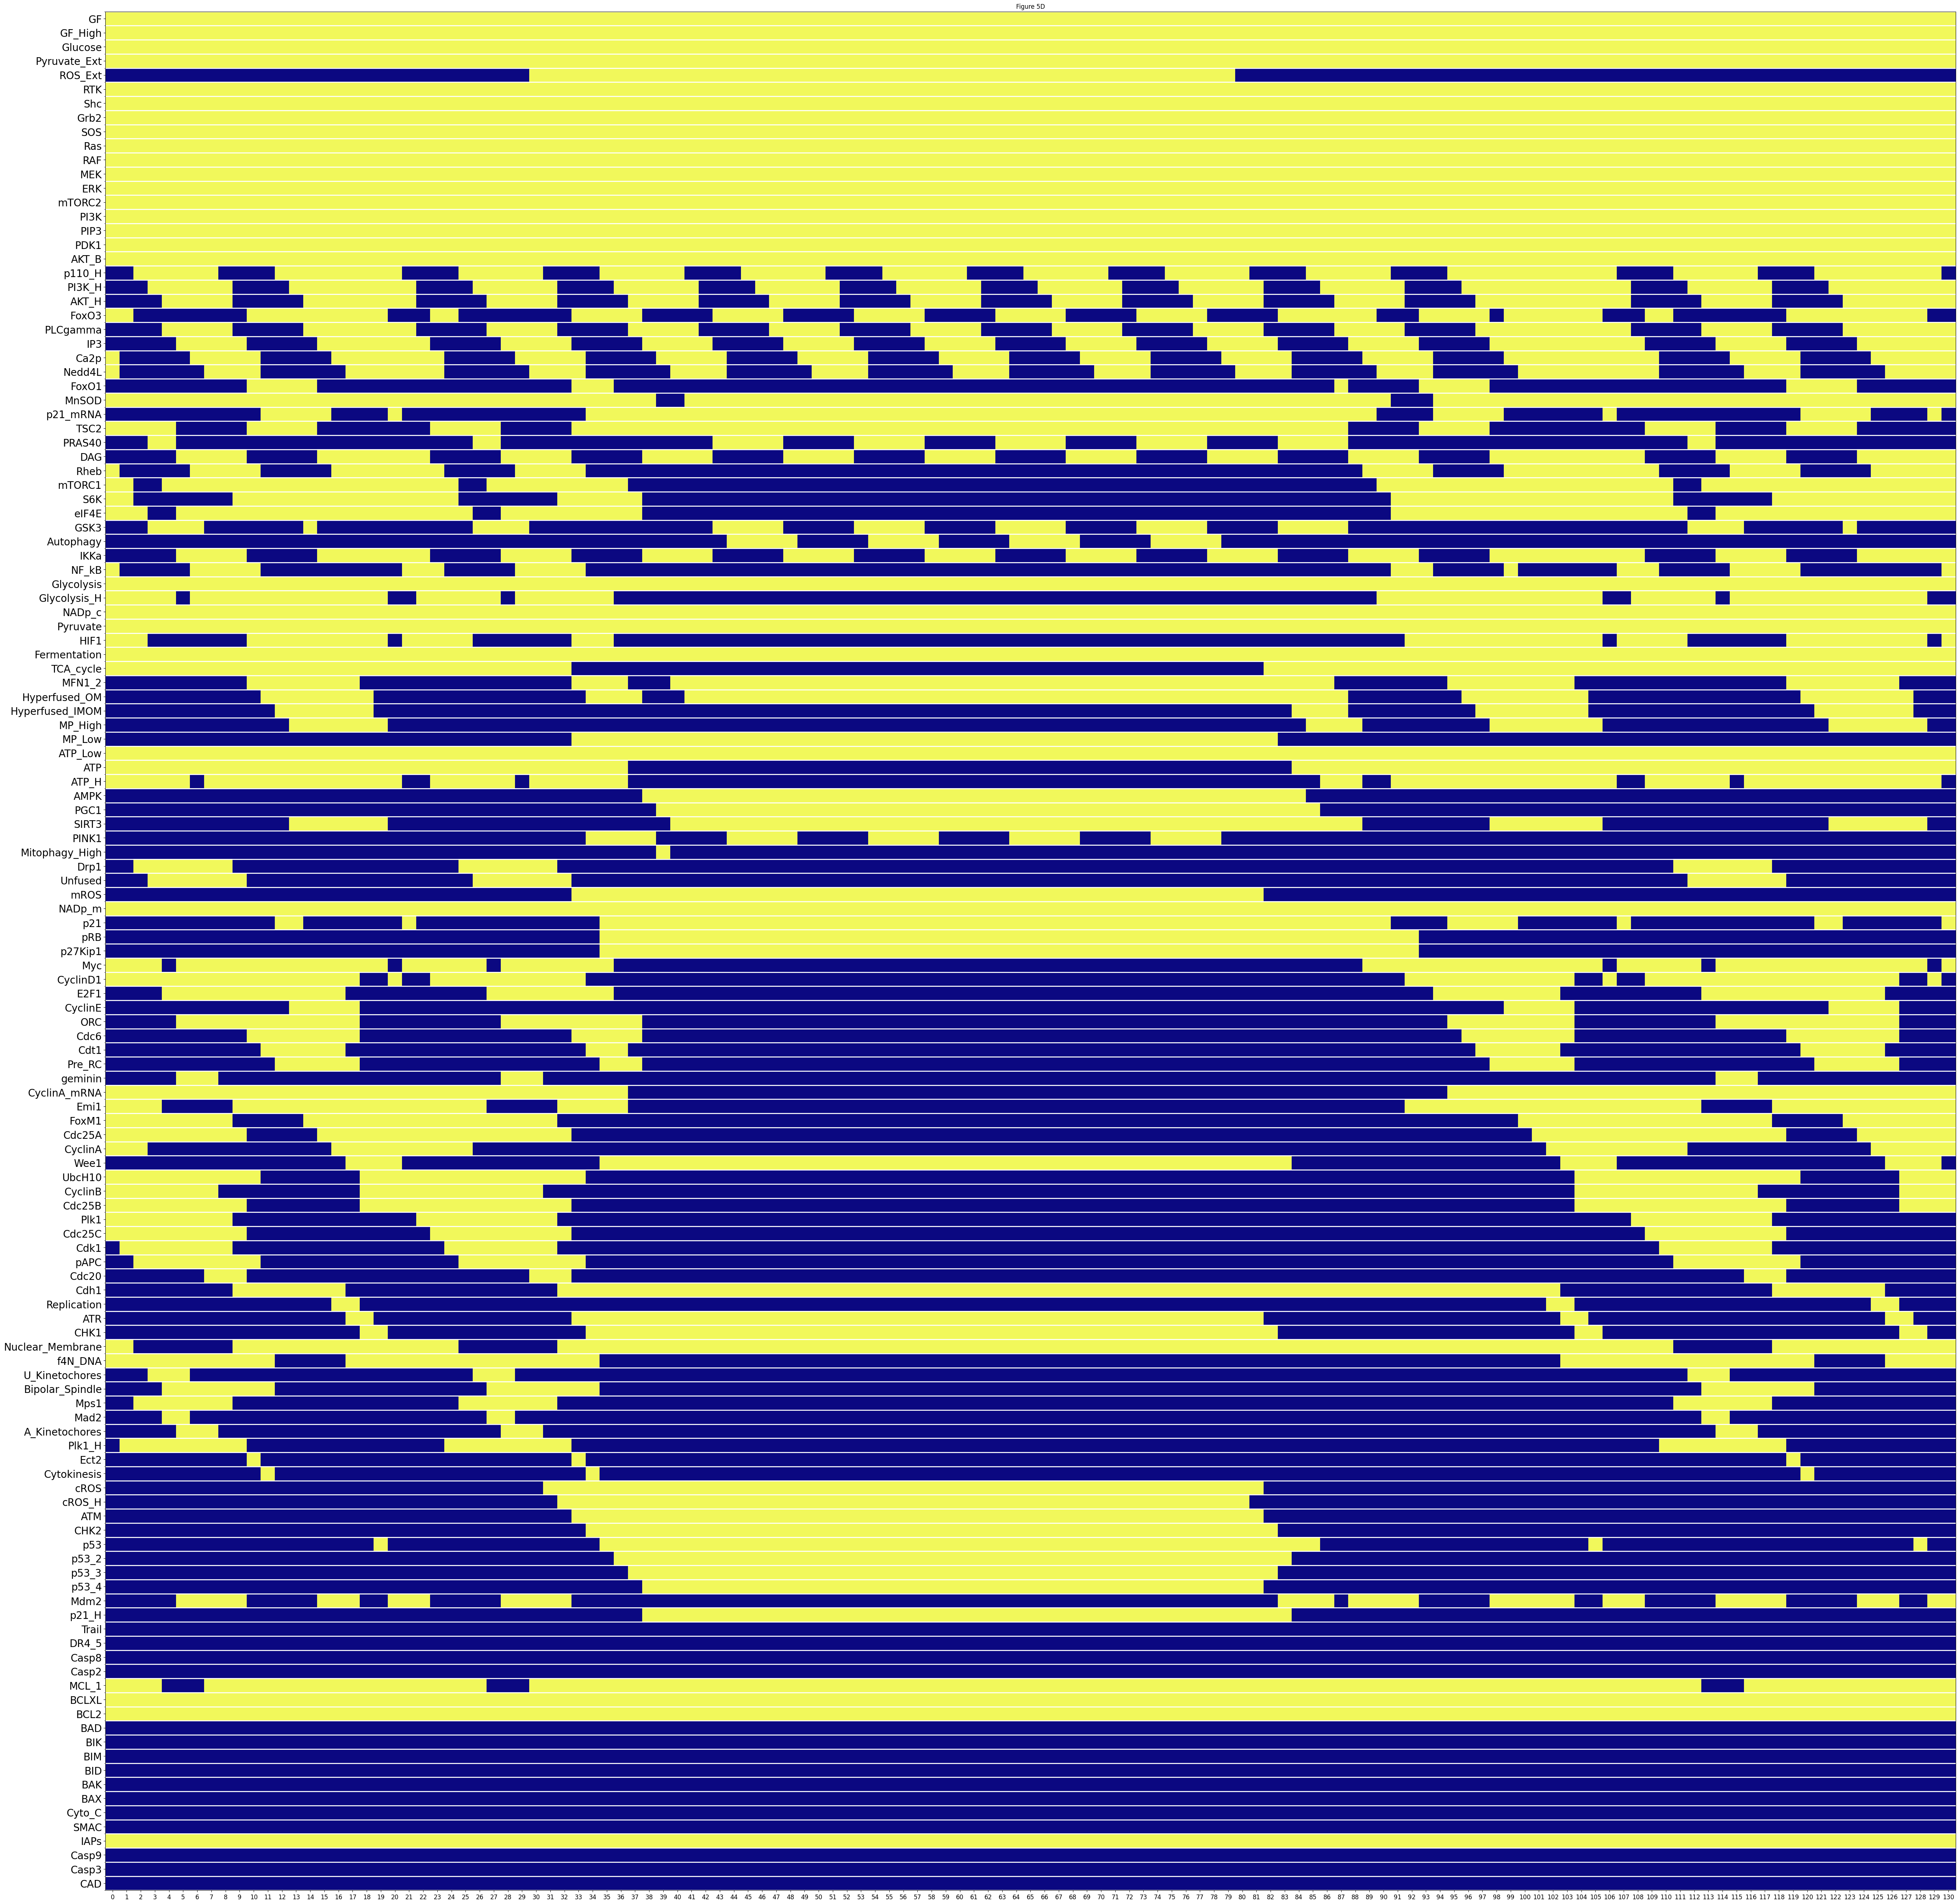

In [50]:
for fig_name in figure_initial_state_columns:
    print(fig_name)

    initial_state=dict(zip([i.strip() for i in df_states['Nodes']],df_states[figure_initial_state_columns[fig_name]]))

    sync_model = bn.Model(rules, mode='sync')
    sync_model.initialize(lambda node: initial_state[node])

    ensemble_size=1
    steps=130
    break_states=[]

    manipulation_set=[{'node':figure_perturbation_params[fig_name][0],'enforced_state':figure_perturbation_params[fig_name][1], 'start_time':figure_perturbation_params[fig_name][2], 'end_time':steps,'success_probability':1},
                    {'node':figure_perturbation_params[fig_name][0],'enforced_state':int(not figure_perturbation_params[fig_name][1]), 'start_time':figure_perturbation_params[fig_name][3], 'end_time':steps,'success_probability':1}]

    es=esim.EnsembleSimulation(sync_model,initial_state=initial_state,ensemble_size=ensemble_size,steps=steps)
    es.simulate_manipulated_ensemble(manipulation_set,break_states=break_states)
    plot_state_succession(sync_model.states,nodes = initial_state.keys(),fontsizey=20,title='Figure %s'%fig_name)

In [51]:
figure_perturbation_params[fig_name]

('ROS_Ext', 1, 30, 80)